Connected to MLENV (Python 3.11.5)

 **Chapter 1 – The Machine Learning landscape**

 _This is the code used to generate some of the figures in chapter 1._

 **Chapter 1 – The Machine Learning landscape**

 _This is the code used to generate some of the figures in chapter 1._

 **Chapter 1 – The Machine Learning landscape**

 _This is the code used to generate some of the figures in chapter 1._

 **Chapter 1 – The Machine Learning landscape**

 _This is the code used to generate some of the figures in chapter 1._

 <table align="left">
   <td>
     <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
   </td>
   <td>
     <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
   </td>
 </table>

 # Code example 1-1

 Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

 This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)

    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

 The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in `datasets/lifesat`.

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

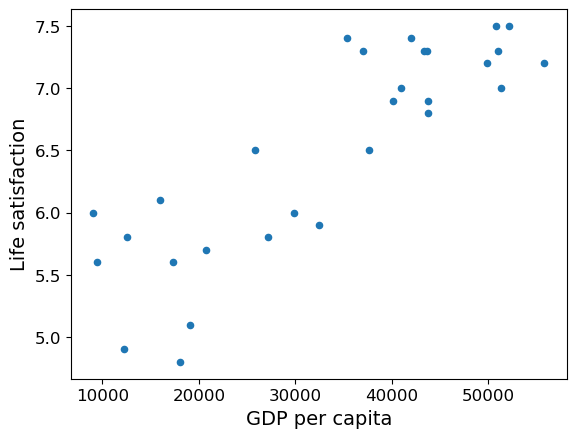

[[5.96242338]]


In [7]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

KeyError: 'banana'

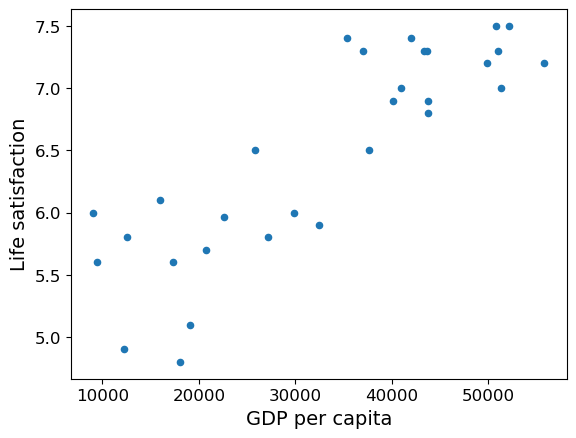

In [8]:
# this is a valdation cell to the addituon of one point to the 
# data

#adding the point to the data set
country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.show()

In [9]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [10]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


<Axes: xlabel='GDP per capita', ylabel='Life satisfaction'>

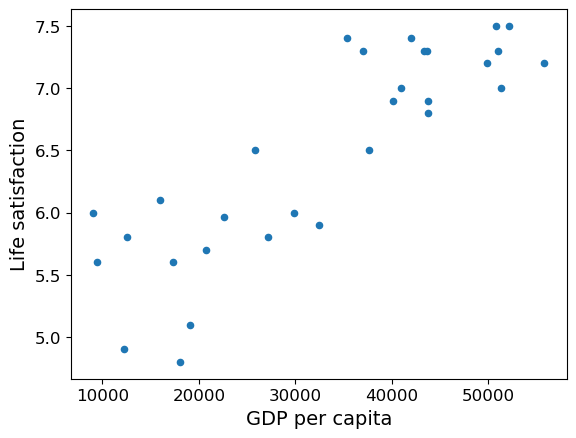

In [11]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')


In [12]:
country_stats.index

Index([         'Russia',          'Turkey',         'Hungary',
                'Poland', 'Slovak Republic',         'Estonia',
                'Greece',        'Portugal',        'Slovenia',
                 'Spain',           'Korea',           'Italy',
                 'Japan',          'Israel',     'New Zealand',
                'France',         'Belgium',         'Germany',
               'Finland',          'Canada',     'Netherlands',
               'Austria',  'United Kingdom',          'Sweden',
               'Iceland',       'Australia',         'Ireland',
               'Denmark',   'United States',                29],
      dtype='object', name='Country')

In [13]:
country_stats.index[-1]

29

In [14]:
country_stats.index[-1] ="banana"
country_stats.index[-1]

TypeError: Index does not support mutable operations

In [15]:
country_stats.index.name[-1] ="banana"
country_stats.index[-1]

TypeError: 'str' object does not support item assignment

In [16]:
strTo = "banana"
country_stats.index.name[-1] = strTo
country_stats.index[-1]

TypeError: 'str' object does not support item assignment

In [17]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set
country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]

#rename the last point to "banana"
country_stats.rename(index={29: 'Row_1'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [18]:
country_stats.loc[len(country_stats.index)]

KeyError: 31

In [19]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [20]:
country_stats.iloc[len(country_stats.index)]

IndexError: single positional indexer is out-of-bounds

In [21]:
country_stats.iloc[len(country_stats)]

IndexError: single positional indexer is out-of-bounds

In [22]:
country_stats.iloc[-1]

GDP per capita       22587.000000
Life satisfaction        5.962423
Name: 30, dtype: float64

In [23]:
country_stats.loc[-1]

KeyError: -1

In [24]:
country_stats.iloc[-1]

GDP per capita       22587.000000
Life satisfaction        5.962423
Name: 30, dtype: float64

In [25]:
country_stats.iloc[-1]["Life satisfaction"]

5.96242338

In [26]:
country_stats.iloc[-1,2]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [27]:
country_stats.iloc[-1,1]

5.96242338

In [28]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if country_stats.iloc[-1]["Life satisfaction"] == 5.9624233 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'Row_1'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [29]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if country_stats.iloc[-1]["Life satisfaction"] == 5.9624233 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'Row_1'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [30]:
country_stats.iloc[-1]["Life satisfaction"]

5.96242338

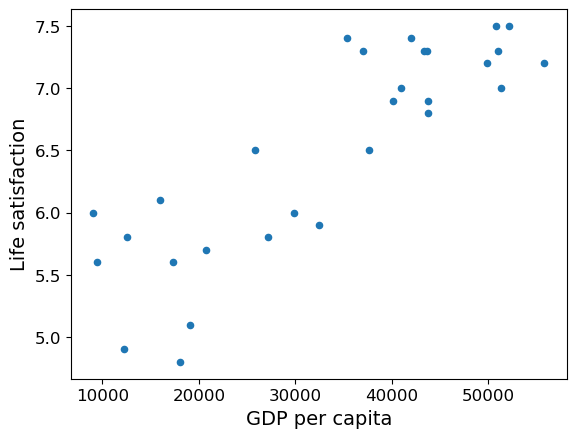

[[5.96242338]]


In [31]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [32]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [33]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if country_stats.iloc[-1]["Life satisfaction"] == 5.9624233 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'Row_1'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [34]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if country_stats.iloc[-1]["Life satisfaction"] == 5.9624233 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [35]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if country_stats.iloc[-1]["Life satisfaction"] == 5.962423 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [36]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if country_stats.iloc[-1]["Life satisfaction"] == 5.962423 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [37]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == round(5.962) :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [38]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == round(5.962) :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [39]:
round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3)

5.962

In [40]:
type(round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3))

numpy.float64

In [41]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [42]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


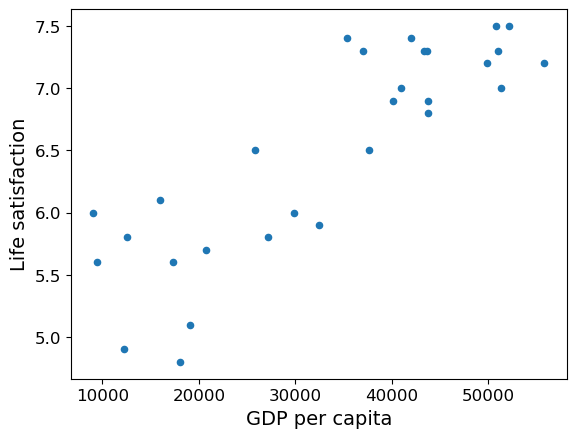

[[5.96242338]]


In [43]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [44]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [45]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


KeyError: 'banana'

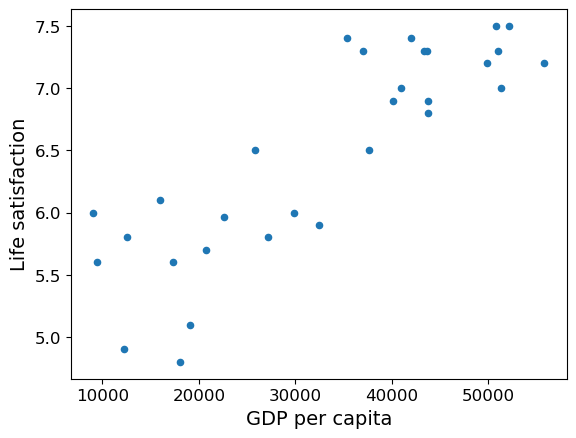

In [46]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.show()

In [47]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


KeyError: 'banana'

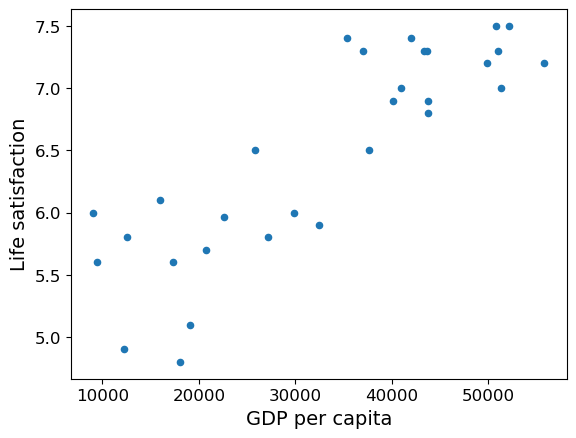

In [48]:
# this is a vallation cell to the addition of one point to the 
# data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.show()

In [49]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


KeyError: 'banana'

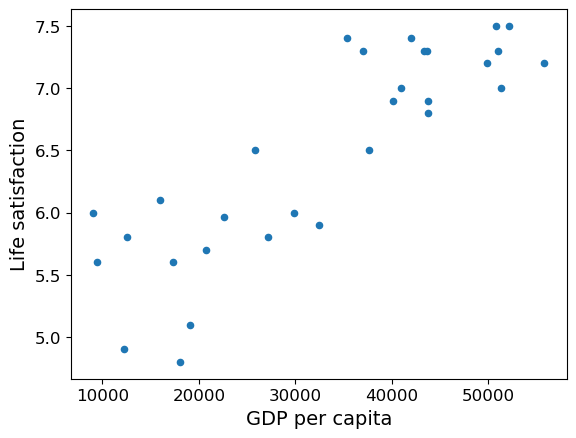

In [50]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={29: 'banana'})

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.show()

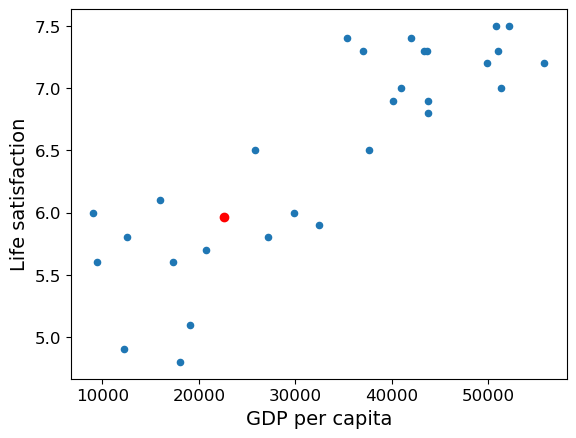

In [51]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={ 29: 'banana'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.show()

In [52]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


 Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two
 lines:

 ```python
 import sklearn.linear_model
 model = sklearn.linear_model.LinearRegression()
 ```

 with these two:

 ```python
 import sklearn.neighbors
 model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
 ```

In [53]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]

[[5.76666667]]


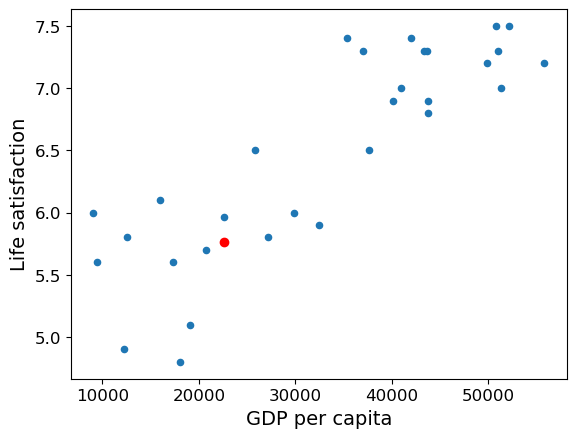

In [54]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#adding the new point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.766 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "banana"
country_stats.rename(index={ 30: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
melon_point = country_stats.loc["melon"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], melon_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.show()

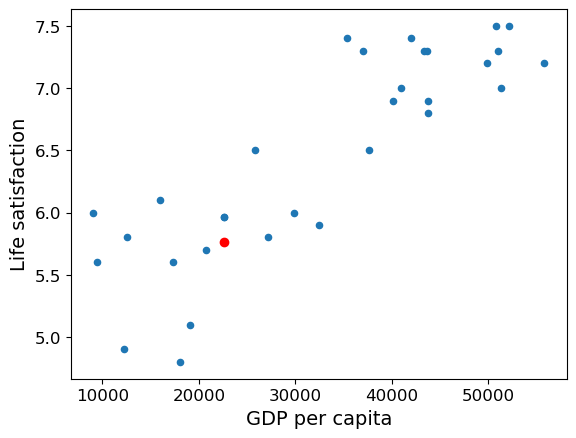

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


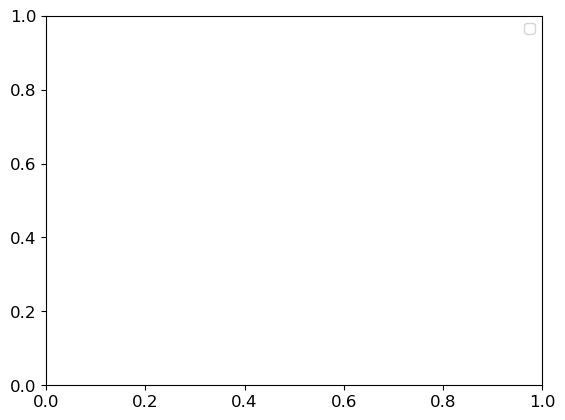

In [55]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#adding the new point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.766 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "banana"
country_stats.rename(index={ 30: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
melon_point = country_stats.loc["melon"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], melon_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.show()
plt.legend()

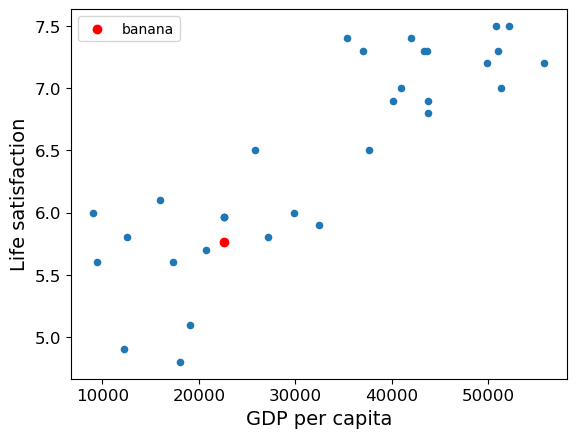

In [56]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#adding the new point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.766 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "banana"
country_stats.rename(index={ 30: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
melon_point = country_stats.loc["melon"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], melon_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.legend()
plt.show()

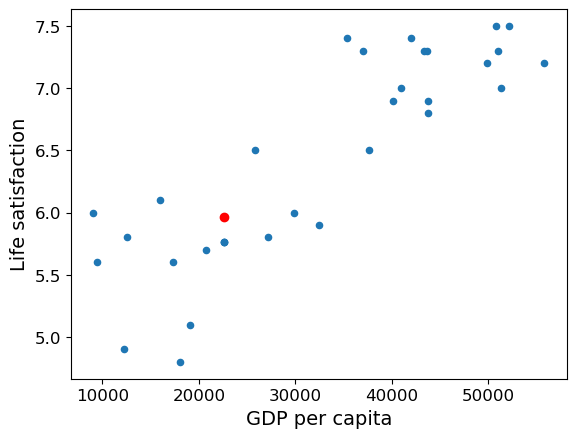

In [57]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={ 29: 'banana'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
plt.show()

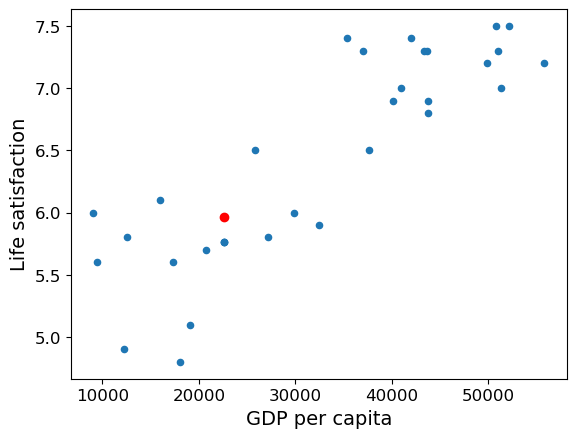

In [58]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={ 29: 'banana'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
# plt.show()

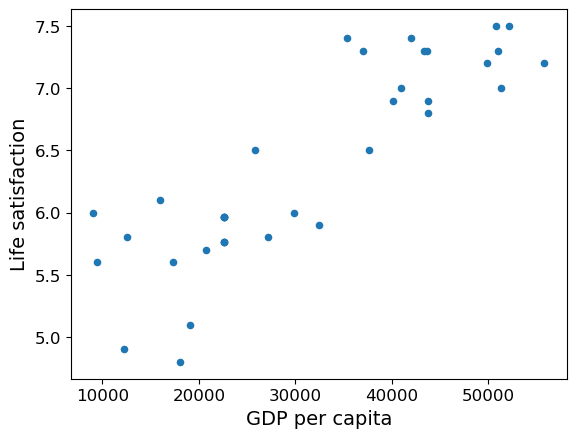

In [59]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={ 29: 'banana'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
# plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
# plt.show()

In [60]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={ 29: 'banana'} , inplace= True)

# Visualize the data
# country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
# plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
# plt.show()

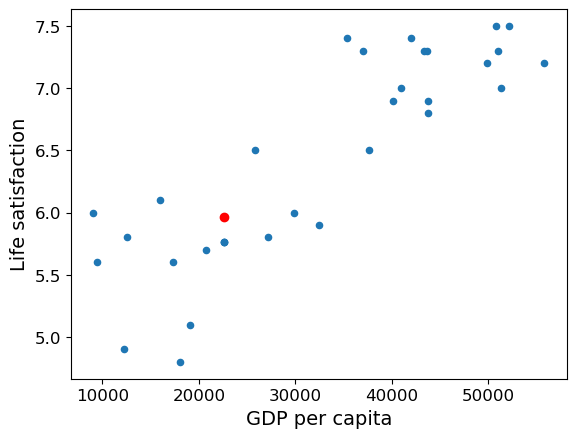

In [61]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={ 29: 'banana'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
# plt.show()

In [62]:
plt.show()

In [63]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]

[[5.76666667]]


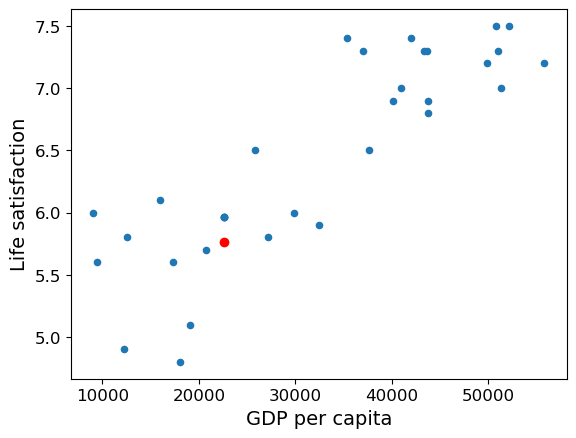

In [64]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.766 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "melon"
country_stats.rename(index={ 29: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "melon"
melon_point = country_stats.loc["melon"]
# Plot the "melon" point in red
plt.scatter(melon_point["GDP per capita"], melon_point["Life satisfaction"], color="red", label="melon")

# Show the plot
plt.show()

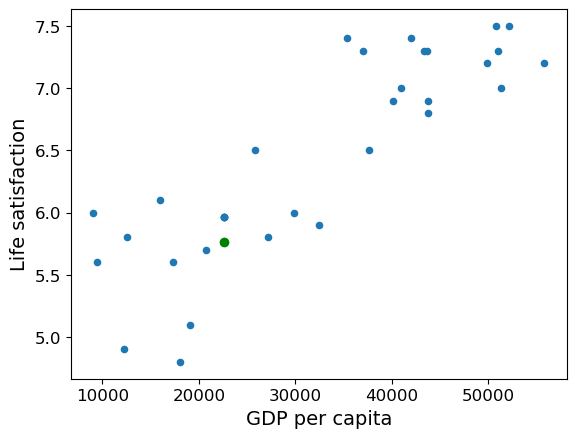

In [65]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.766 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "melon"
country_stats.rename(index={ 29: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "melon"
melon_point = country_stats.loc["melon"]
# Plot the "melon" point in red
plt.scatter(melon_point["GDP per capita"], melon_point["Life satisfaction"], color="green", label="melon")

# Show the plot
plt.show()

In [66]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


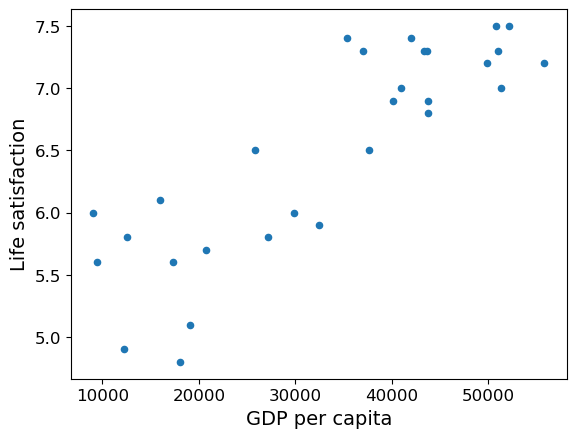

[[5.96242338]]


In [67]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [68]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


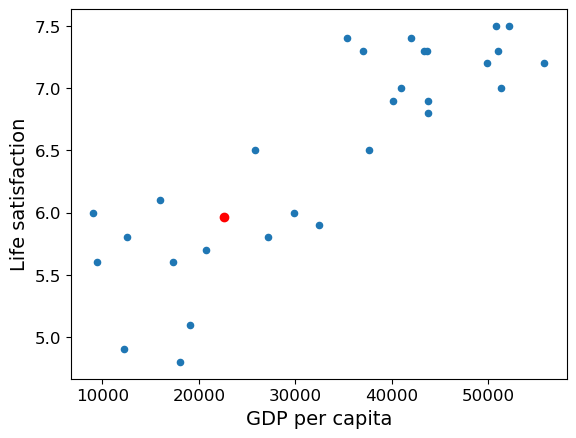

In [69]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={ 29: 'banana'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
# plt.show()

In [70]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


KeyError: 'melon'

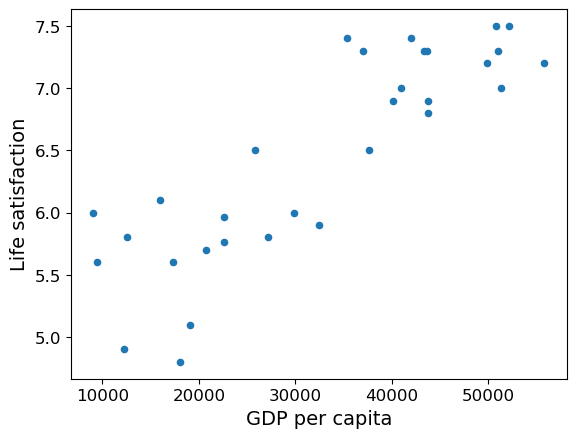

In [71]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.766 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "melon"
country_stats.rename(index={ 29: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "melon"
melon_point = country_stats.loc["melon"]
# Plot the "melon" point in red
plt.scatter(melon_point["GDP per capita"], melon_point["Life satisfaction"], color="green", label="melon")

# Show the plot
plt.show()

In [72]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


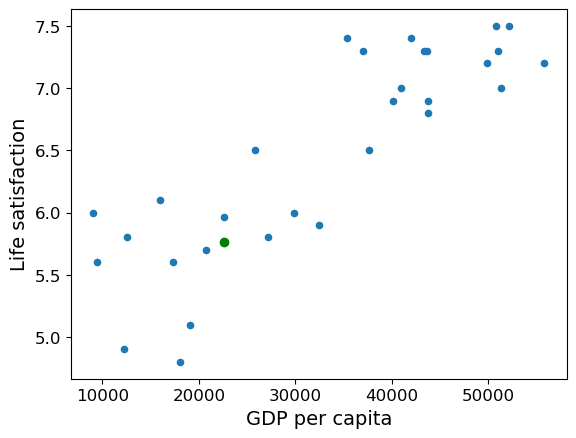

In [73]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.766 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "melon"
country_stats.rename(index={ 30: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "melon"
melon_point = country_stats.loc["melon"]
# Plot the "melon" point in red
plt.scatter(melon_point["GDP per capita"], melon_point["Life satisfaction"], color="green", label="melon")

# Show the plot
plt.show()

In [74]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000


In [75]:
round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3)

5.767

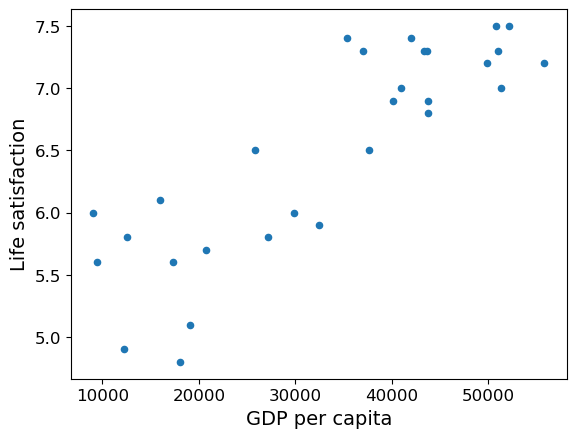

[[5.96242338]]


In [76]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

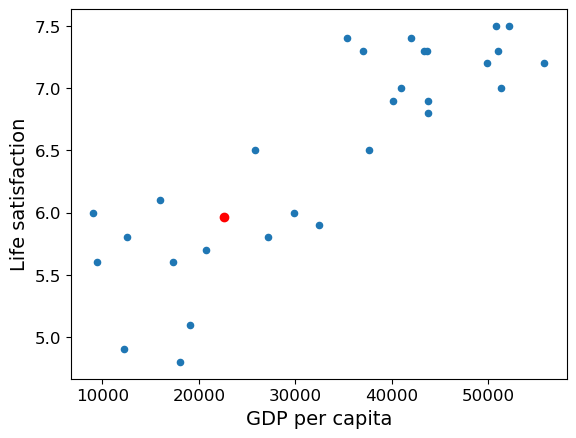

In [77]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.962 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.96242338]   

#rename the last point to "banana"
country_stats.rename(index={ 29: 'banana'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "banana"
banana_point = country_stats.loc["banana"]
# Plot the "banana" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")

# Show the plot
# plt.show()

 Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two
 lines:

 ```python
 import sklearn.linear_model
 model = sklearn.linear_model.LinearRegression()
 ```

 with these two:

 ```python
 import sklearn.neighbors
 model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
 ```

In [78]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]

[[5.76666667]]


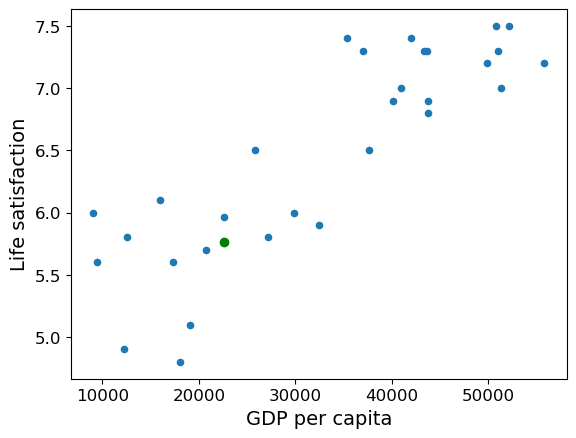

In [79]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.767 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "melon"
country_stats.rename(index={ 30: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "melon"
melon_point = country_stats.loc["melon"]
# Plot the "melon" point in red
plt.scatter(melon_point["GDP per capita"], melon_point["Life satisfaction"], color="green", label="melon")

# Show the plot
plt.show()

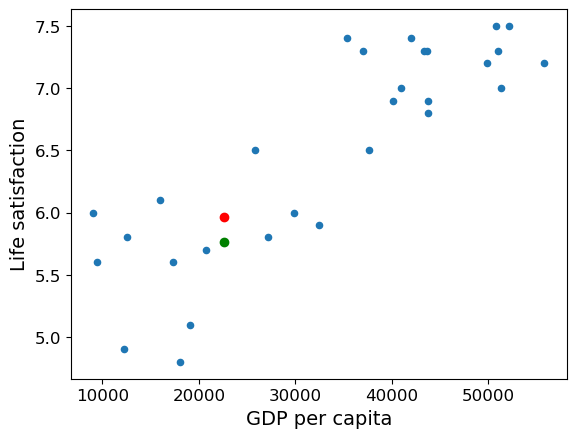

In [80]:
# this is a vallation cell to the addition of one point to the data

#adding the point to the data set with condition
if round(country_stats.iloc[-1]["Life satisfaction"],ndigits=3) == 5.767 :
    pass
else:
    country_stats.loc[len(country_stats.index)]= [22587, 5.76666667]   

#rename the last point to "melon"
country_stats.rename(index={ 30: 'melon'} , inplace= True)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Find the coordinates of the point with index "melon"
melon_point = country_stats.loc["melon"]
# Plot the "melon" point in red
plt.scatter(banana_point["GDP per capita"], banana_point["Life satisfaction"], color="red", label="banana")
plt.scatter(melon_point["GDP per capita"], melon_point["Life satisfaction"], color="green", label="melon")

# Show the plot
plt.show()

In [81]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.000000
Turkey,9437.372,5.600000
Hungary,12239.894,4.900000
Poland,12495.334,5.800000
Slovak Republic,15991.736,6.100000
Estonia,17288.083,5.600000
Greece,18064.288,4.800000
Portugal,19121.592,5.100000
Slovenia,20732.482,5.700000
